In [1]:
library(Seurat)
library(CellChat)
library(pheatmap)
library(ComplexHeatmap)

Attaching SeuratObject

载入需要的程辑包：dplyr


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


载入需要的程辑包：igraph


载入程辑包：‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


载入需要的程辑包：ggplot2

载入需要的程辑包：grid

ComplexHeatmap version 2.11.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex h

# cellchat

In [2]:
object.list<-readRDS('./project/merge_sle_immunonolgy_communication_cellchat.rds')

In [3]:
names(object.list)<-c('HD','aSLE','cSLE')

In [4]:
cellchat <- mergeCellChat(object.list, add.names = names(object.list))

Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



In [5]:
cellchat

An object of class CellChat created from a merged object with multiple datasets 
 1009 signaling genes.
 393451 cells.

## Figure 4

### Figure4 A

Warning message in dir.create("./sle_picture/Fig4/"):
“'./sle_picture/Fig4'已存在”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



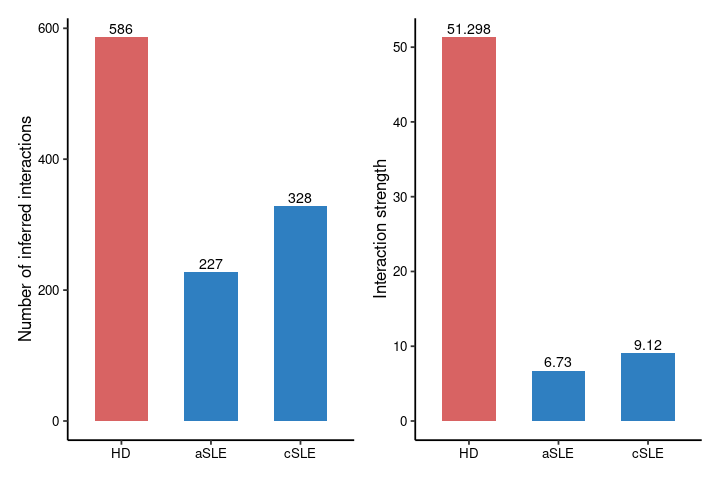

In [6]:
dir.create("./sle_picture/Fig4/")
options(repr.plot.width=6,repr.plot.height=4)
gg1<-compareInteractions(cellchat, show.legend = F, group = c(1,2,2))+scale_fill_manual(values=c('#d86363','#2f7fc1'))
gg2 <- compareInteractions(cellchat, show.legend = F, group = c(1,2,2), measure = "weight")+scale_fill_manual(values=c('#d86363','#2f7fc1'))
p<-gg1 + gg2
p
#ggsave(p,file="./sle_picture/Fig4/cellchat_bar.pdf",width = 6, height =4)

### Figure4 B

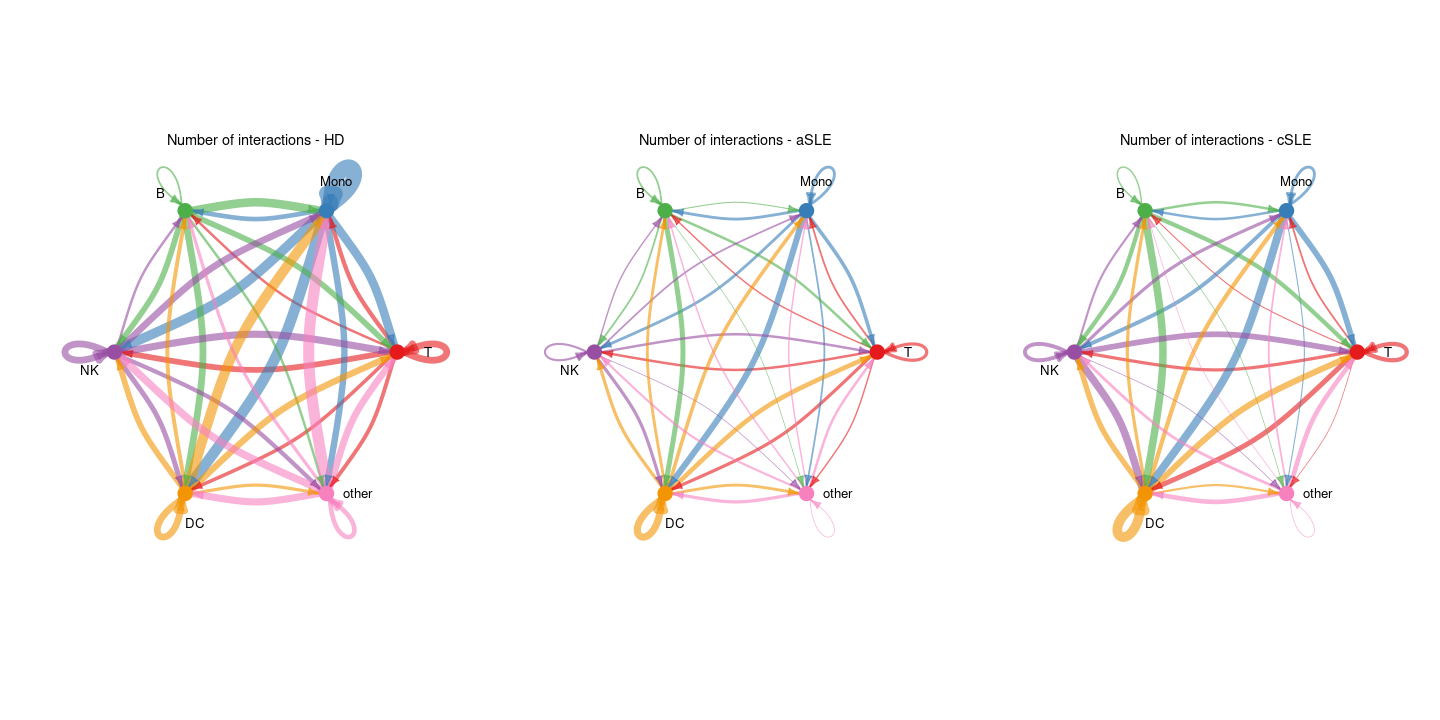

In [7]:
options(repr.plot.width=12,repr.plot.height=6)
weight.max <- getMaxWeight(object.list, attribute = c("idents","count"))
par(mfrow = c(1,3), xpd=TRUE)

for (i in c(1,2,3)) {
  netVisual_circle(object.list[[i]]@net$count, weight.scale = T, label.edge= F, edge.weight.max = weight.max[2], edge.width.max = 12, title.name = paste0("Number of interactions - ", names(object.list)[i]))
}


### Figure4 C

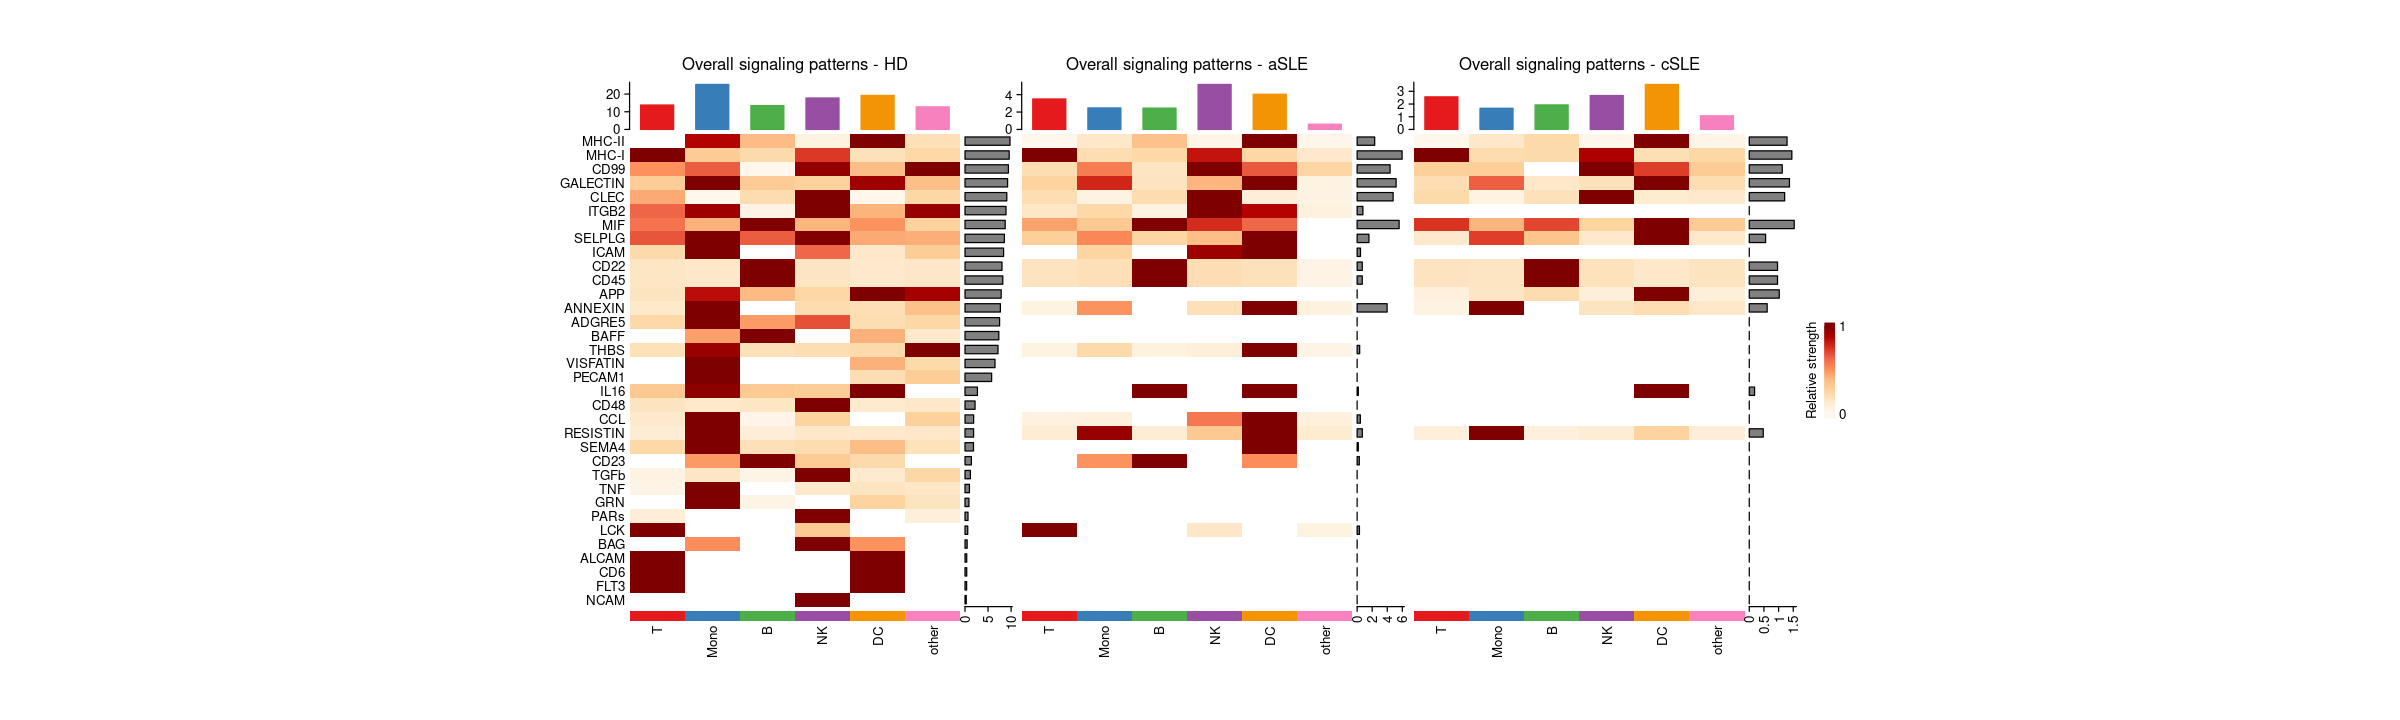

In [8]:
options(repr.plot.width=20)
#options(repr.plot.width=25,repr.plot.height=15)
i = 1
# combining all the identified signaling pathways from different datasets 
pathway.union <- union(object.list[[i]]@netP$pathways, object.list[[i+1]]@netP$pathways)
ht1 = netAnalysis_signalingRole_heatmap(object.list[[i]], pattern = "all", signaling = pathway.union, title = names(object.list)[i], width = 7, height = 10, color.heatmap = "OrRd")
ht2 = netAnalysis_signalingRole_heatmap(object.list[[i+2]], pattern = "all", signaling = pathway.union, title = names(object.list)[i+1], width = 7, height = 10, color.heatmap = "OrRd")
ht3 = netAnalysis_signalingRole_heatmap(object.list[[i+1]], pattern = "all", signaling = pathway.union, title = names(object.list)[i+2], width = 7, height = 10, color.heatmap = "OrRd")
ht1+ht2+ht3

### Figure4 D

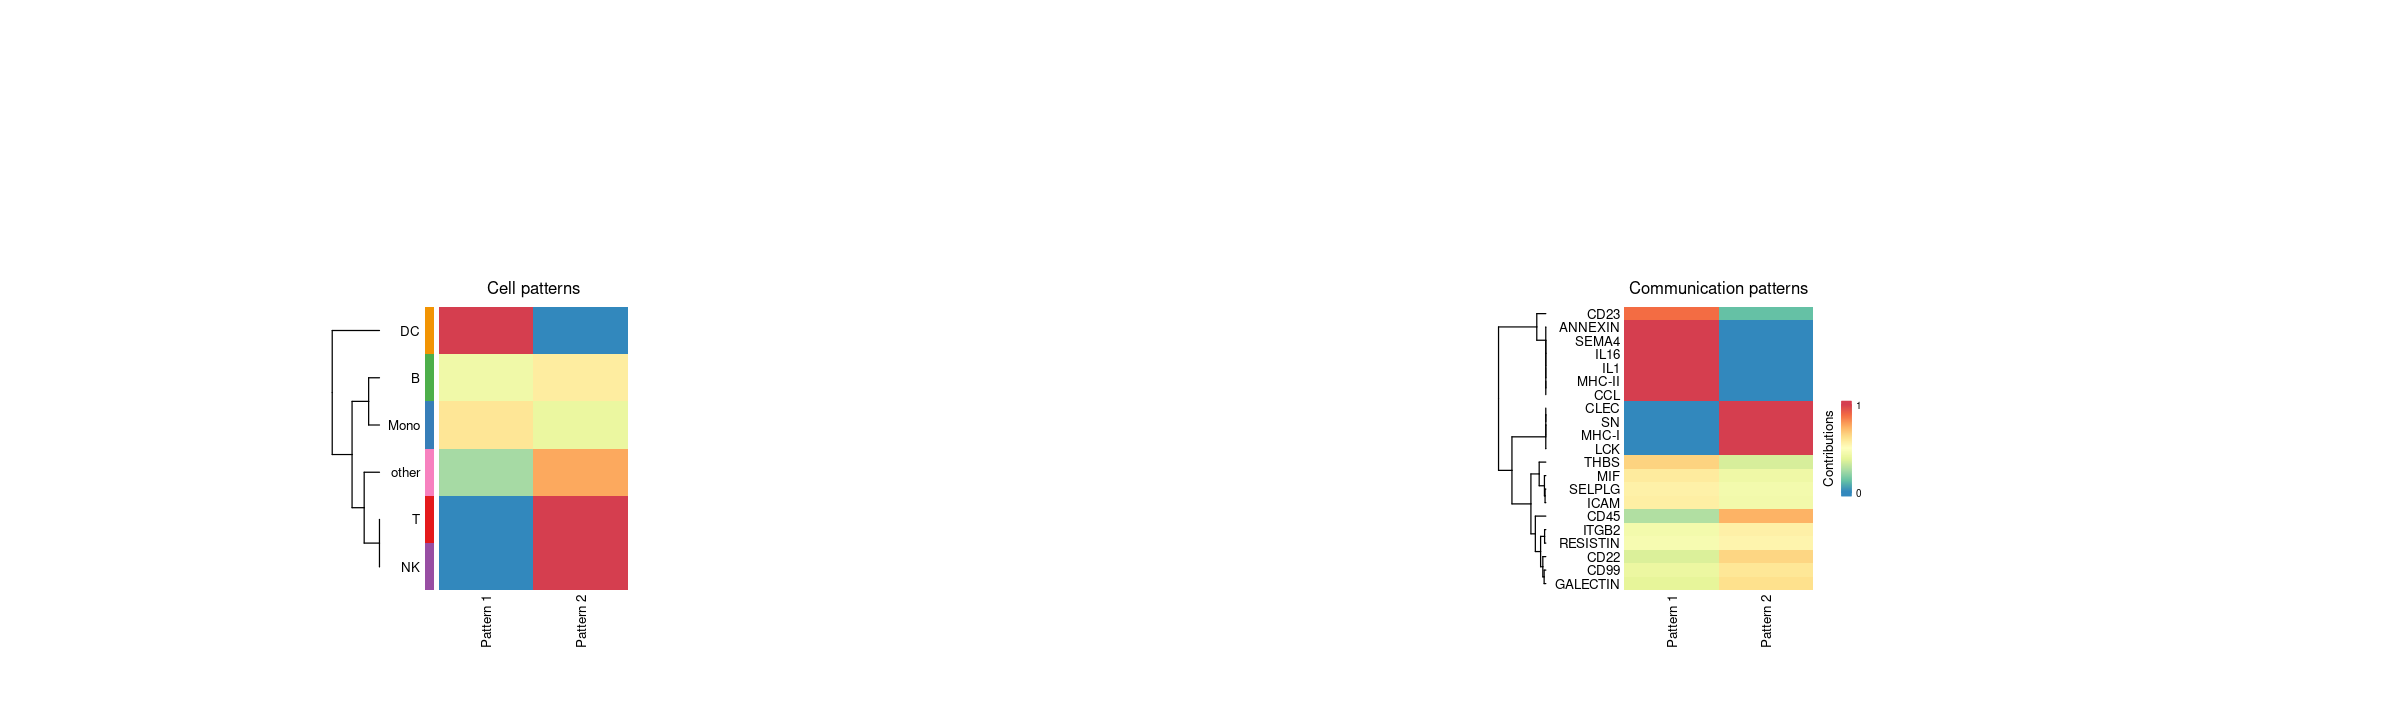

In [9]:
nPatterns = 3
object.list$HD <- identifyCommunicationPatterns(object.list$HD, pattern = "outgoing", k = nPatterns)
object.list$aSLE <- identifyCommunicationPatterns(object.list$aSLE, pattern = "outgoing", k = nPatterns)
object.list$cSLE <- identifyCommunicationPatterns(object.list$cSLE , pattern = "outgoing", k = nPatterns)
nPatterns = 2
object.list$HD <- identifyCommunicationPatterns(object.list$HD, pattern = "incoming", k = nPatterns)
object.list$aSLE <- identifyCommunicationPatterns(object.list$aSLE, pattern = "incoming", k = nPatterns)
object.list$cSLE <- identifyCommunicationPatterns(object.list$cSLE , pattern = "incoming", k = nPatterns)

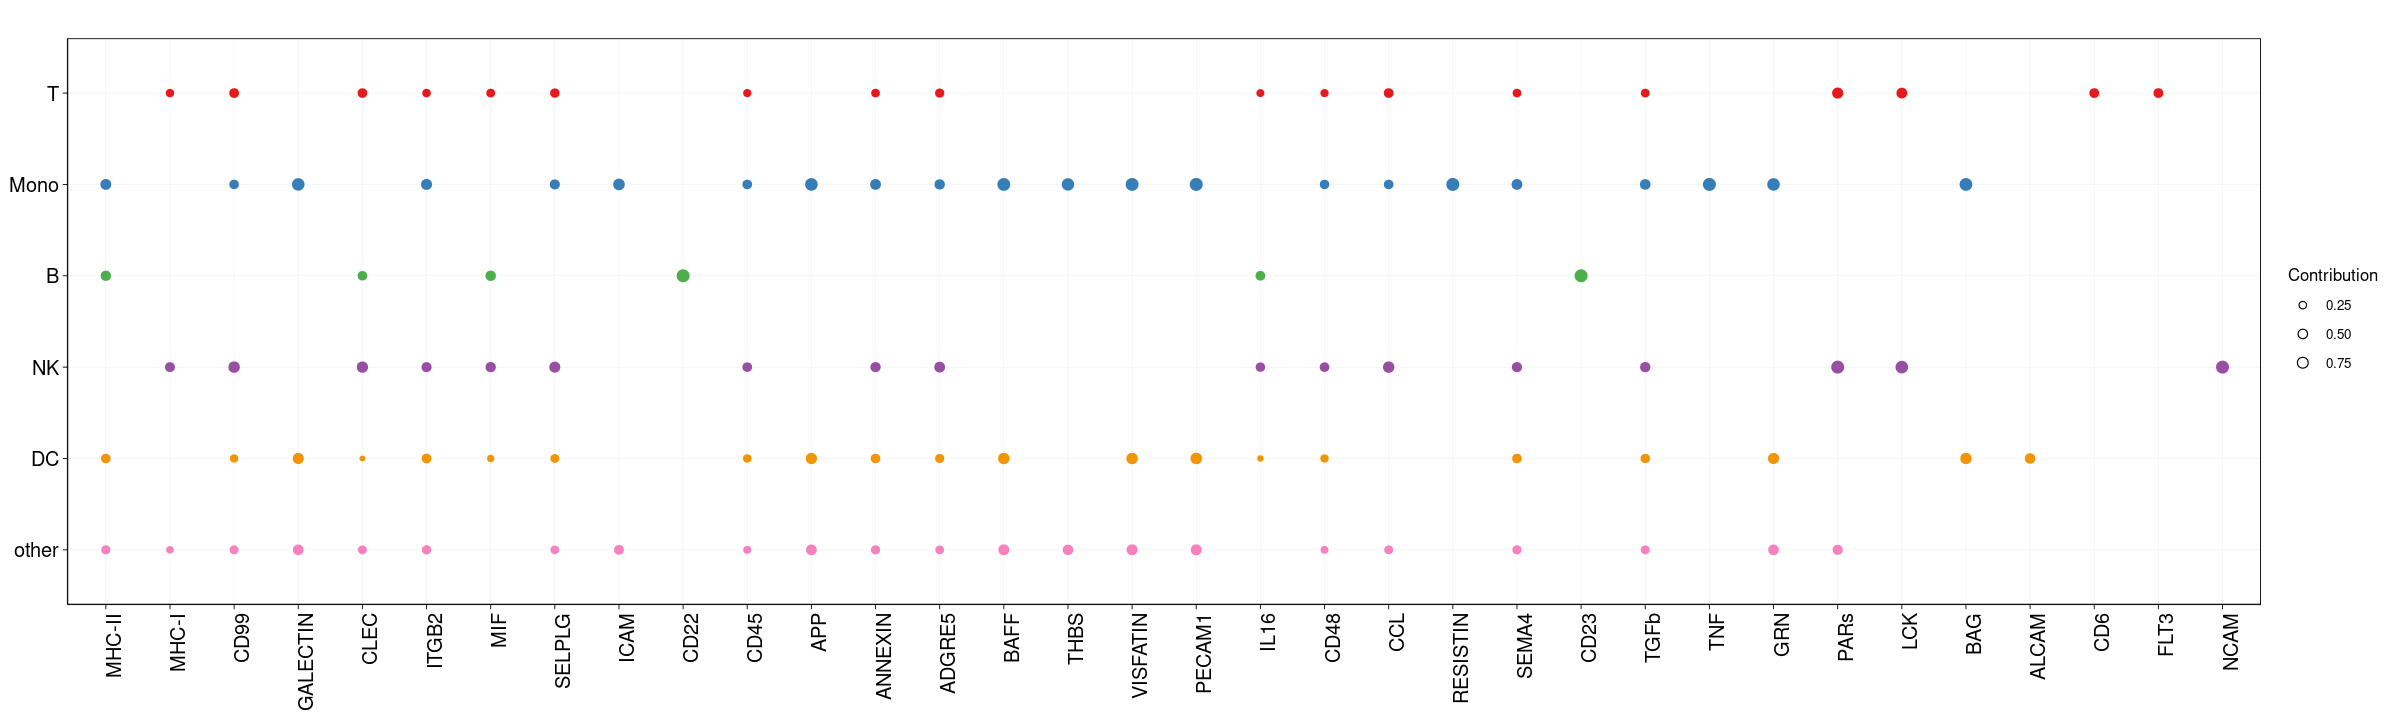

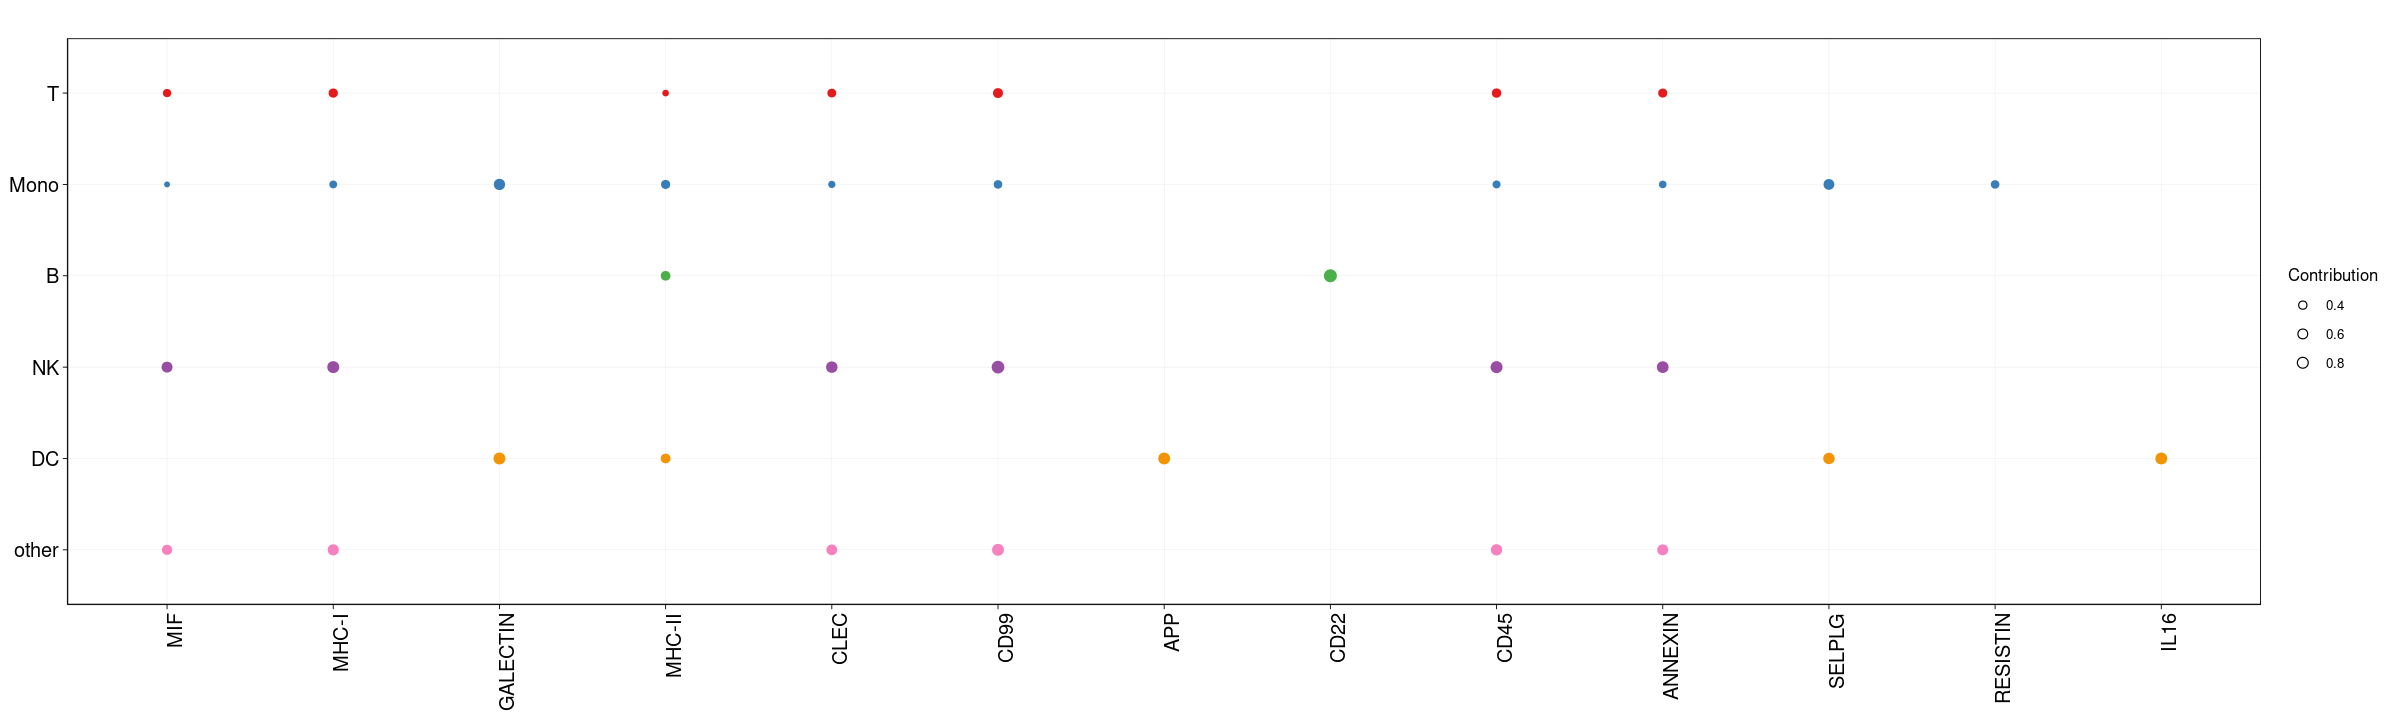

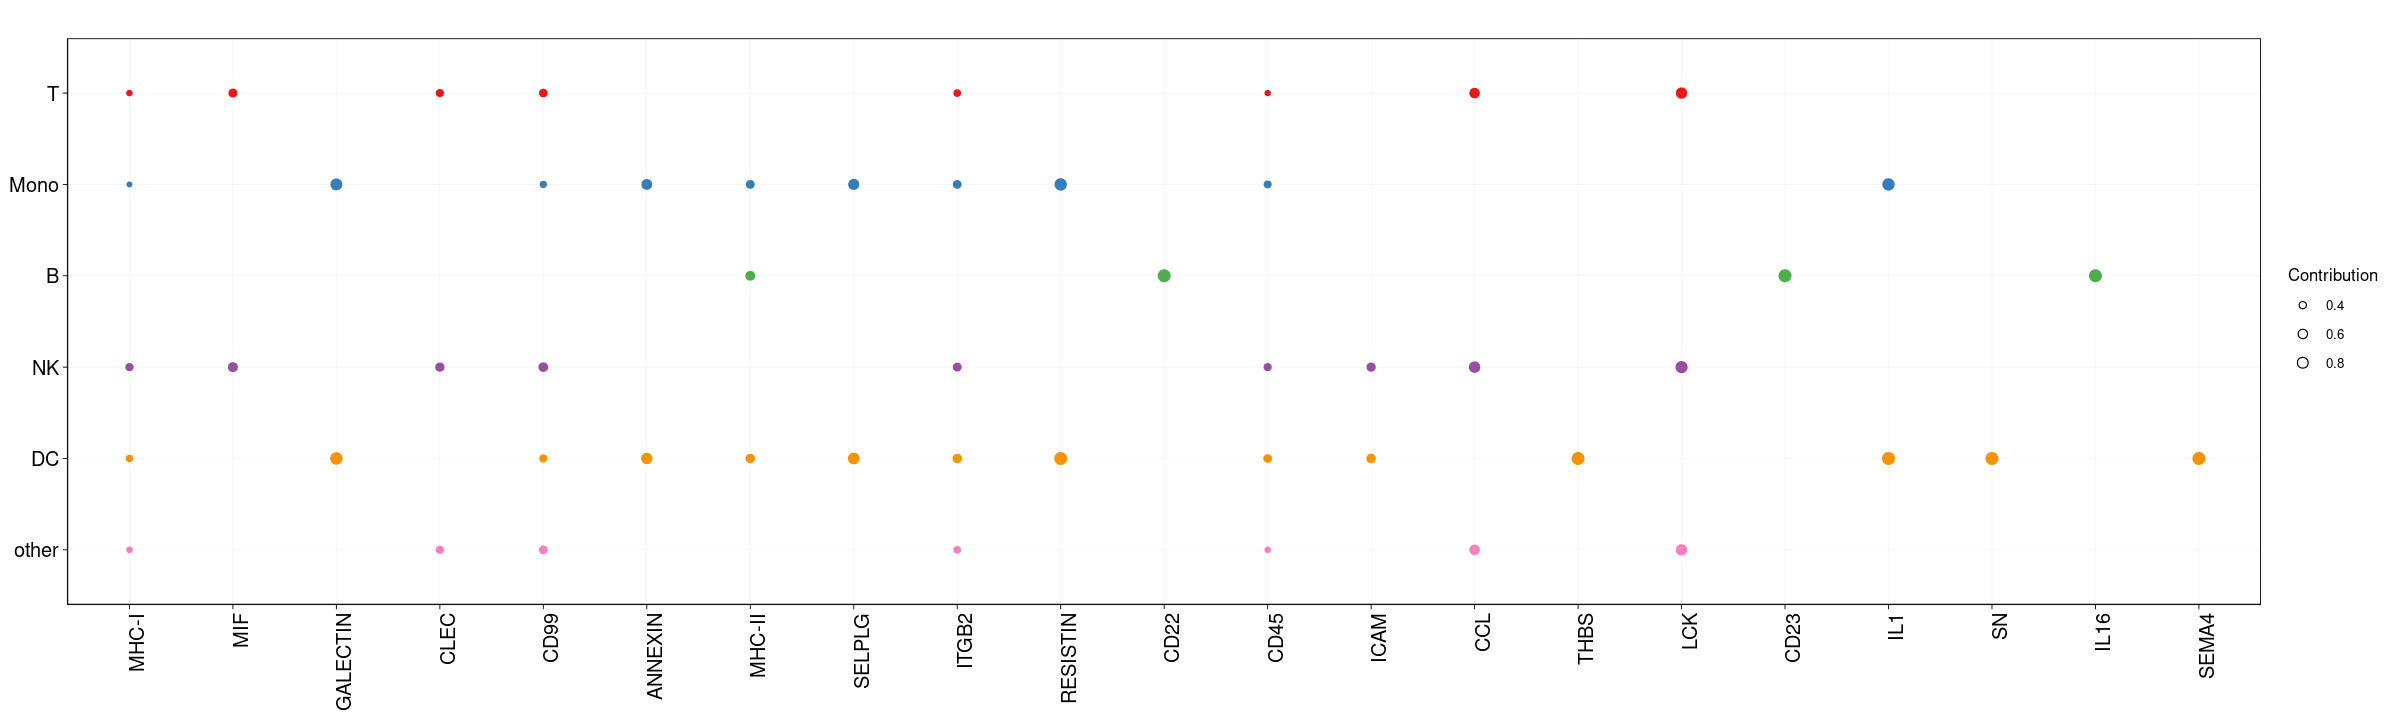

In [10]:
p1 <- netAnalysis_dot(object.list$HD, pattern = "outgoing",font.size=15)+labs(title='',legend="")+theme( 
      axis.text.x=element_text(angle=90))
p1
#ggsave(filename='./sle_picture/Fig4/netdotHD.pdf',plot=p1,width=9.9,height=3.7)
p2 <- netAnalysis_dot(object.list$aSLE, pattern = "outgoing",font.size=15)+labs(title='',legend="")+theme( 
      axis.text.x=element_text(angle=90))
p2
#ggsave(filename='./sle_picture/Fig4/netdotaSLE.pdf',plot=p2,width=9.9,height=3.7)
p3 <- netAnalysis_dot(object.list$cSLE, pattern = "outgoing",font.size=15)+labs(title='')+theme( 
      axis.text.x=element_text(angle=90))
p3
#ggsave(filename='./sle_picture/Fig4/netdotcSLE.pdf',plot=p3,width=9.9,height=3.7)

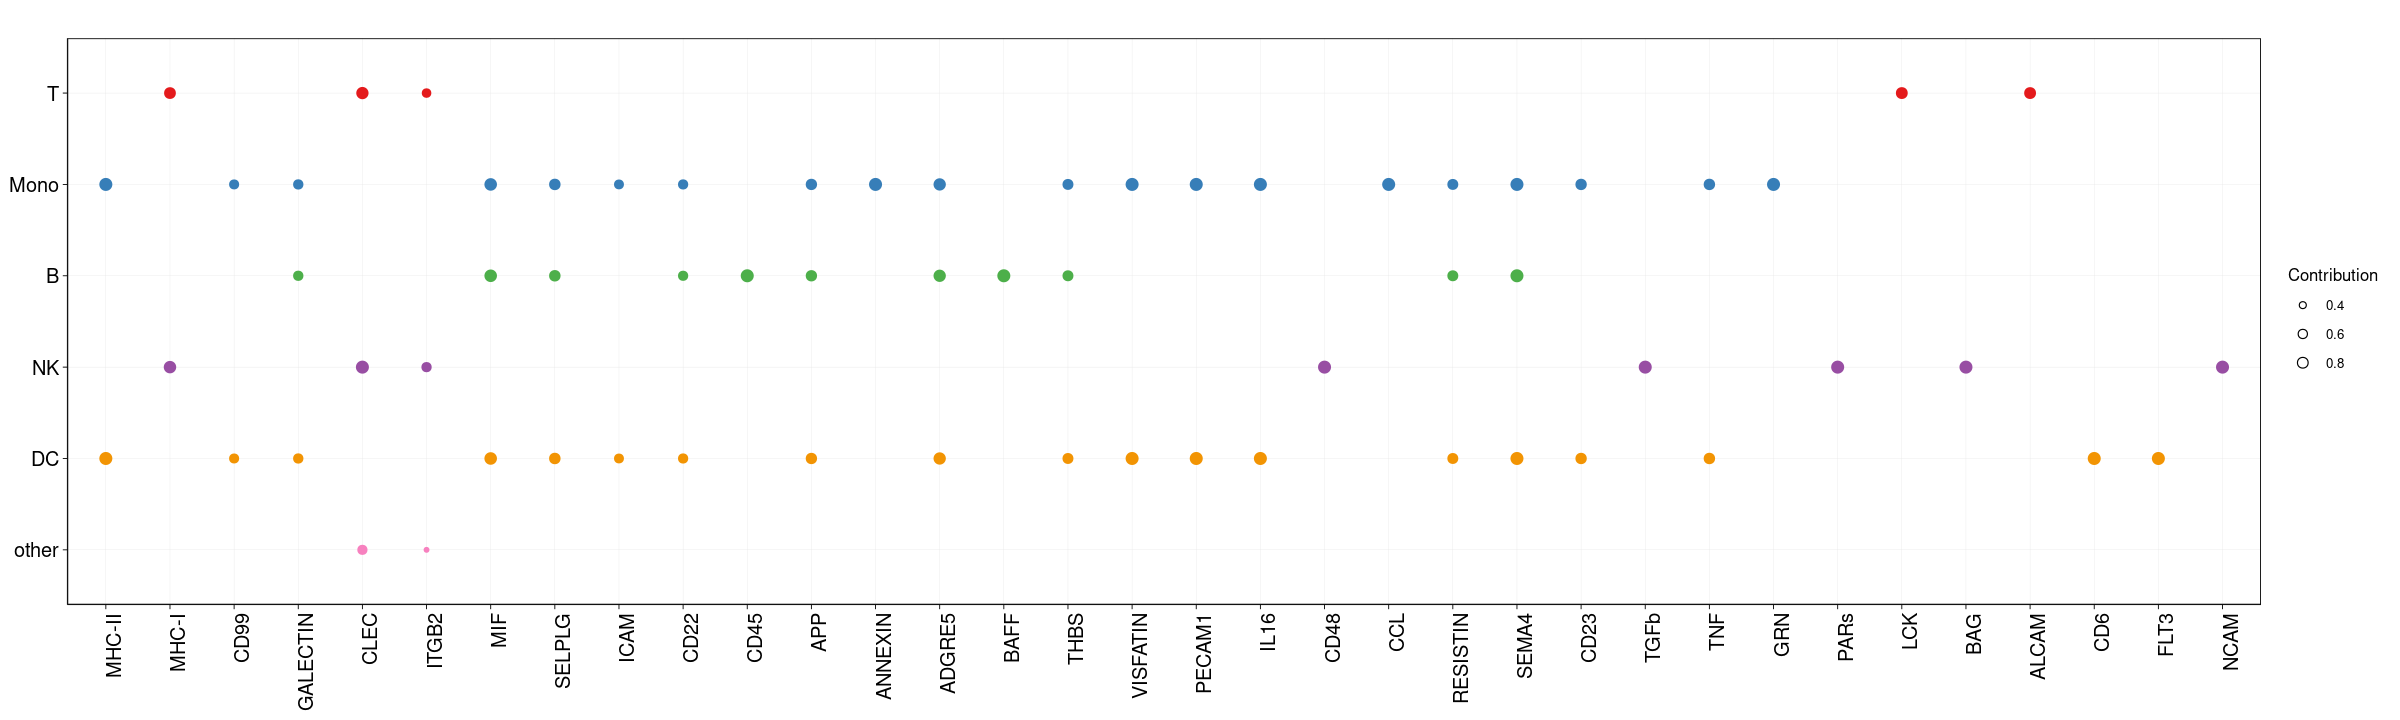

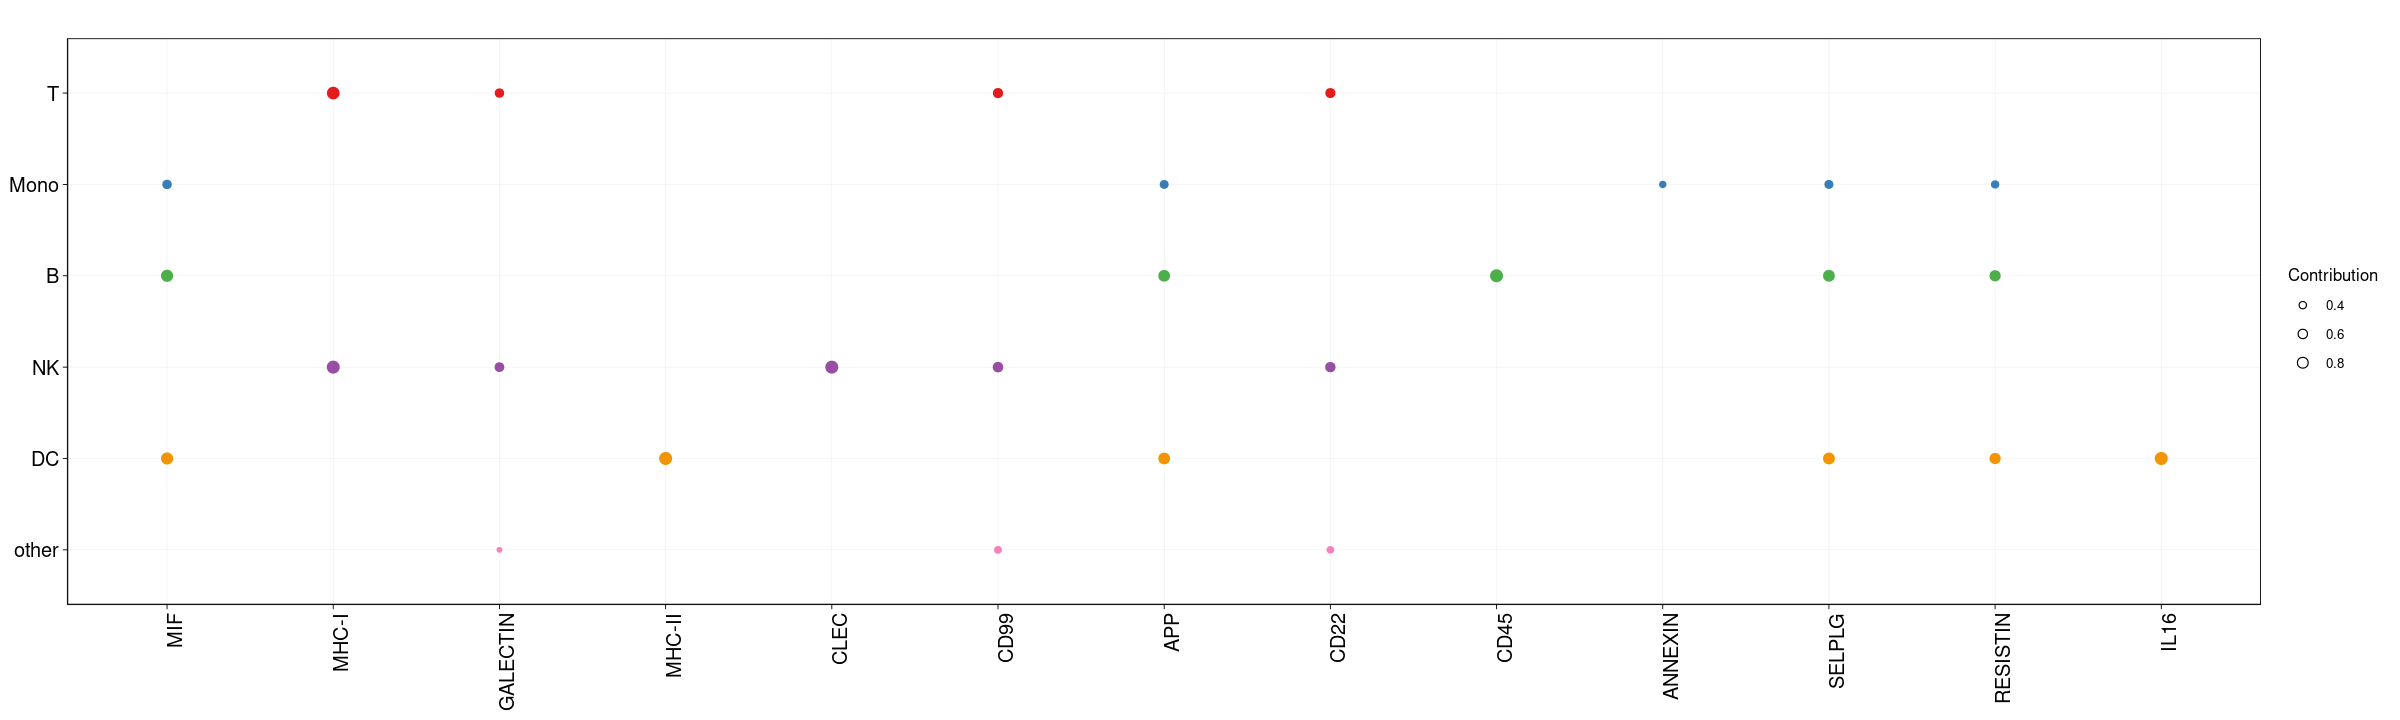

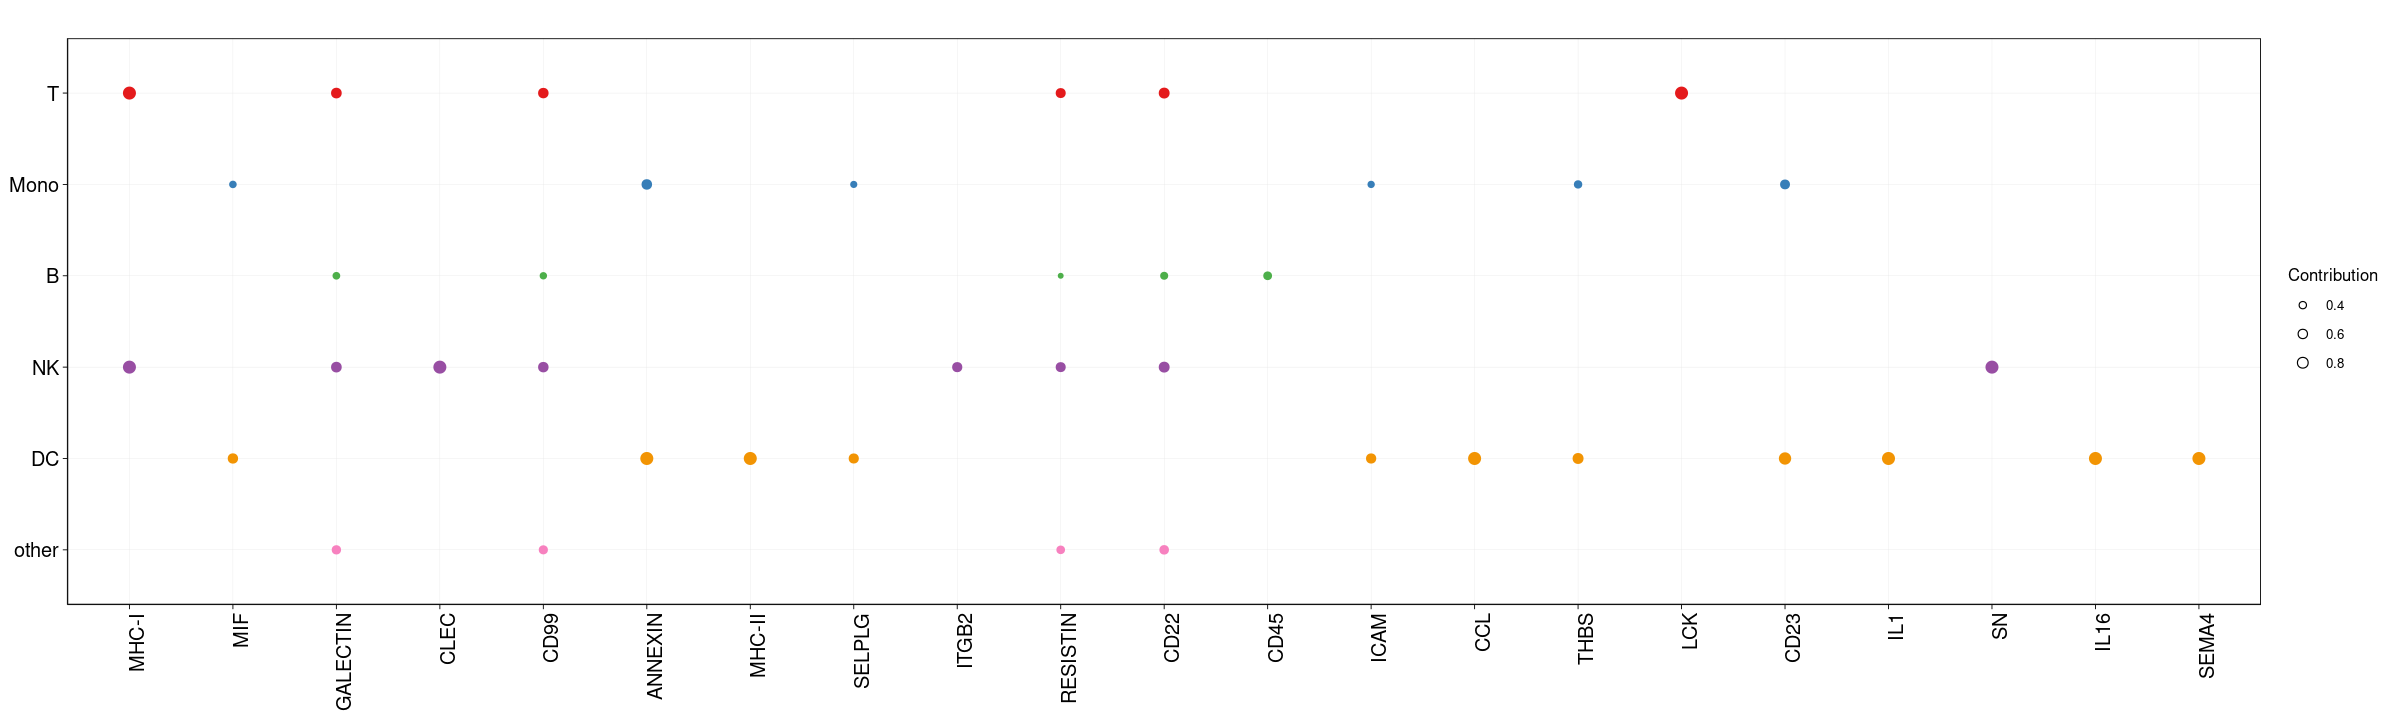

In [11]:
p1 <- netAnalysis_dot(object.list$HD, pattern = "incoming",font.size=15)+labs(title='',legend="")+theme( 
      axis.text.x=element_text(angle=90))
p1
#ggsave(filename='./sle_picture/Fig4/netdot_incoming_HD.pdf',plot=p1,width=9.9,height=3.7)
p2 <- netAnalysis_dot(object.list$aSLE, pattern = "incoming",font.size=15)+labs(title='',legend="")+theme( 
      axis.text.x=element_text(angle=90))
p2
#ggsave(filename='./sle_picture/Fig4/netdot_incoming_aSLE.pdf',plot=p2,width=9.9,height=3.7)
p3 <- netAnalysis_dot(object.list$cSLE, pattern = "incoming",font.size=15)+labs(title='')+theme( 
      axis.text.x=element_text(angle=90))
p3
#ggsave(filename='./sle_picture/Fig4/netdot_incoming_cSLE.pdf',plot=p3,width=9.9,height=3.7)

## Figure5

Comparing communications on a merged object 




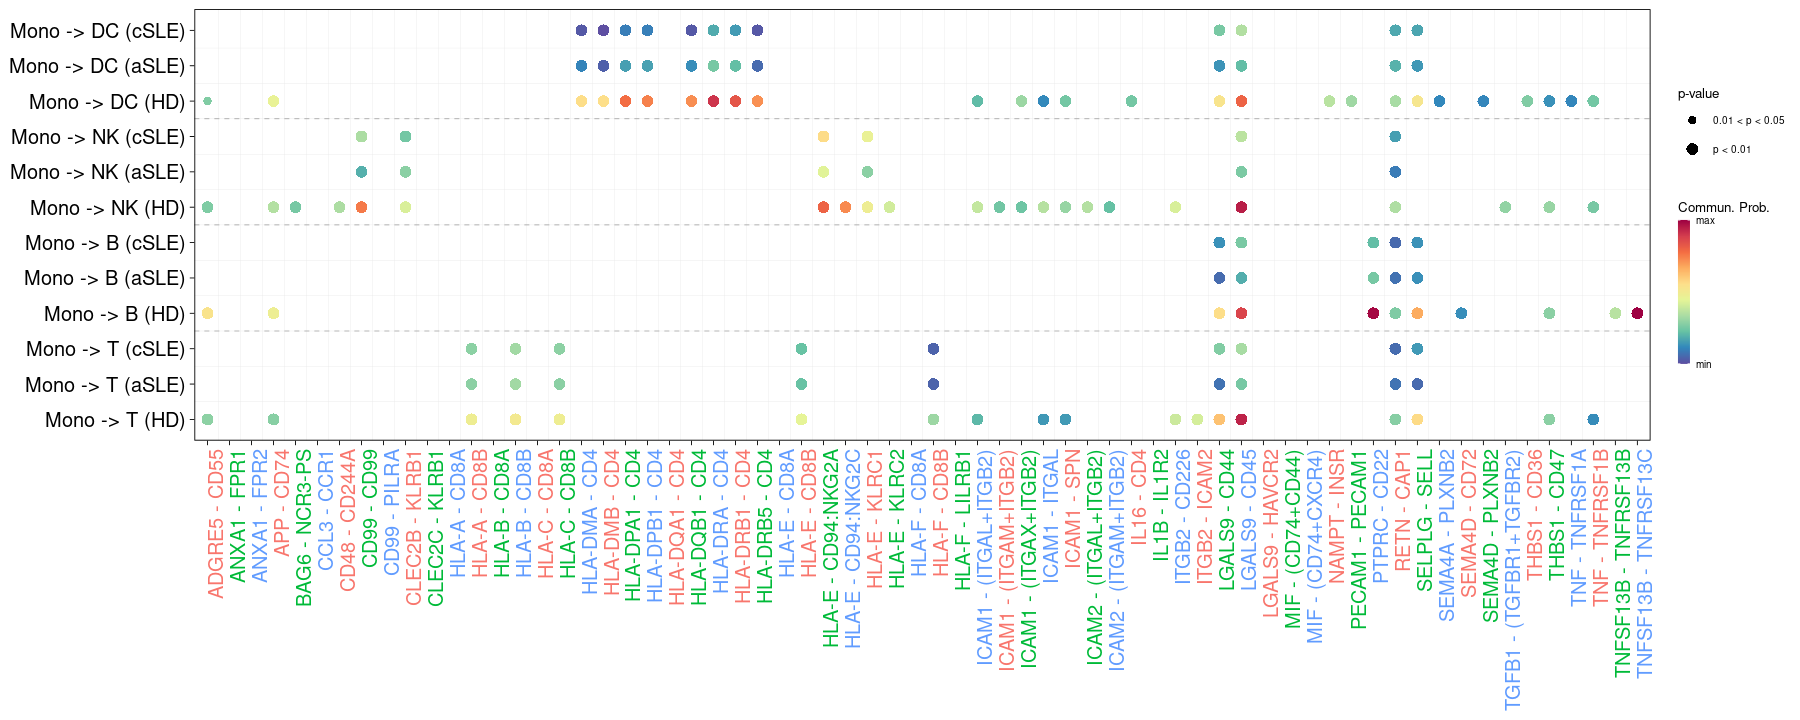

In [12]:
dir.create("./sle_picture/Fig5/")
options(repr.plot.width=15,repr.plot.height=6)
p1 <- netVisual_bubble(cellchat, sources.use = 2, targets.use = c(1,3,4,5),max.dataset = 1,min.dataset = c(2,3),
                 comparison = c(1, 2,3), angle.x = 45,font.size=15)+coord_flip()+theme(axis.text.x=element_text(angle=90, hjust=1))
p1
ggsave(filename='./sle_picture/Fig5/netbub_1.pdf',plot=p1,width=15,height=6)

Comparing communications on a merged object 




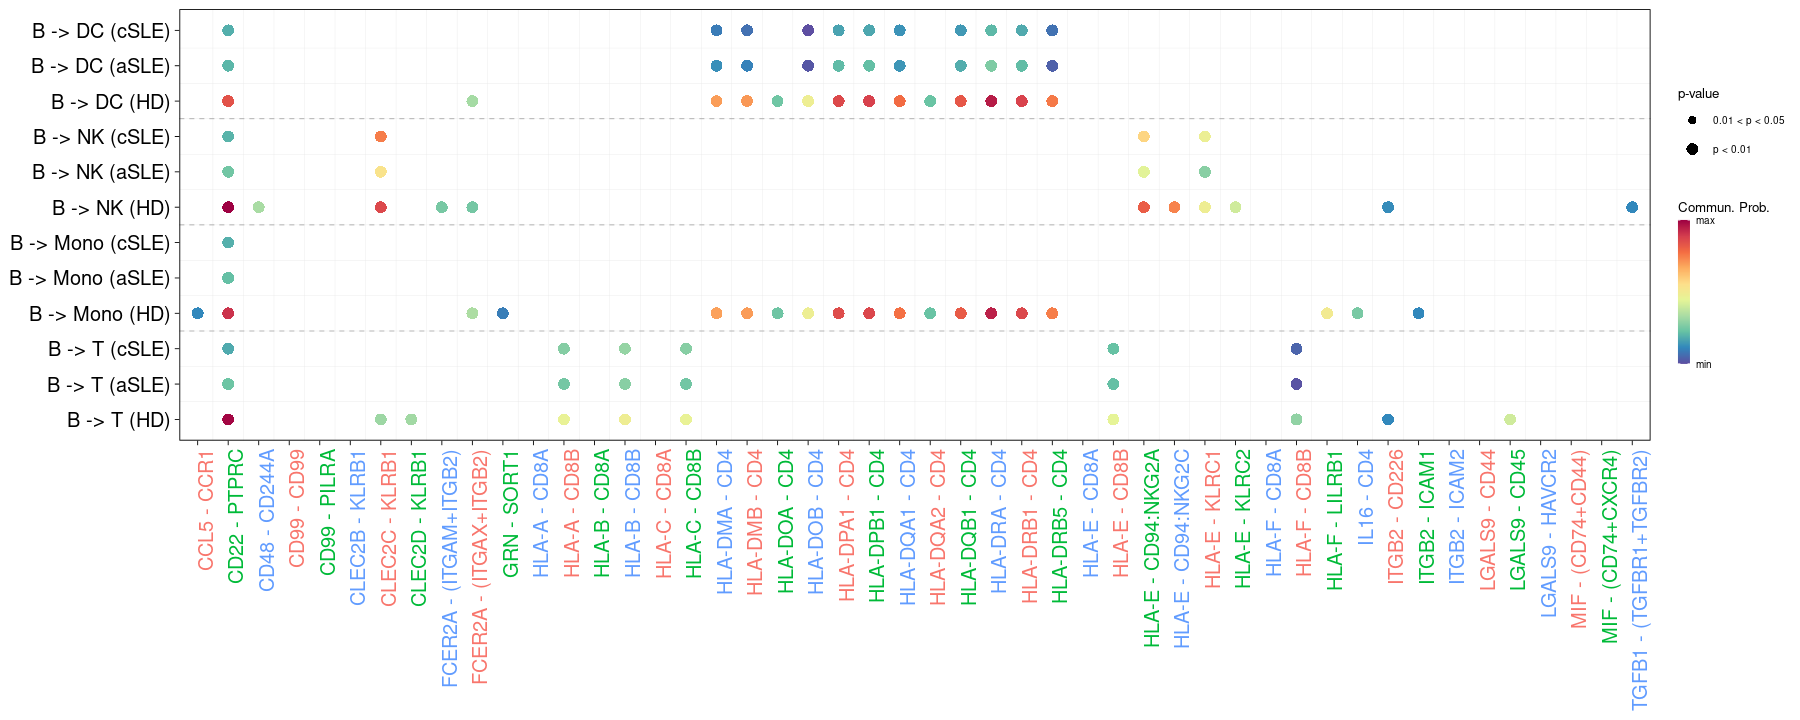

In [13]:
options(repr.plot.width=15,repr.plot.height=6)
p2 <- netVisual_bubble(cellchat, sources.use = 3, targets.use = c(1,2,4,5),max.dataset = 1,min.dataset = c(2,3),
                 comparison = c(1, 2,3), angle.x = 45,font.size=15)+coord_flip()+theme(axis.text.x=element_text(angle=90, hjust=1))
p2
ggsave(filename='./sle_picture/Fig5/netbub_2.pdf',plot=p2,width=15,height=6)

Comparing communications on a merged object 




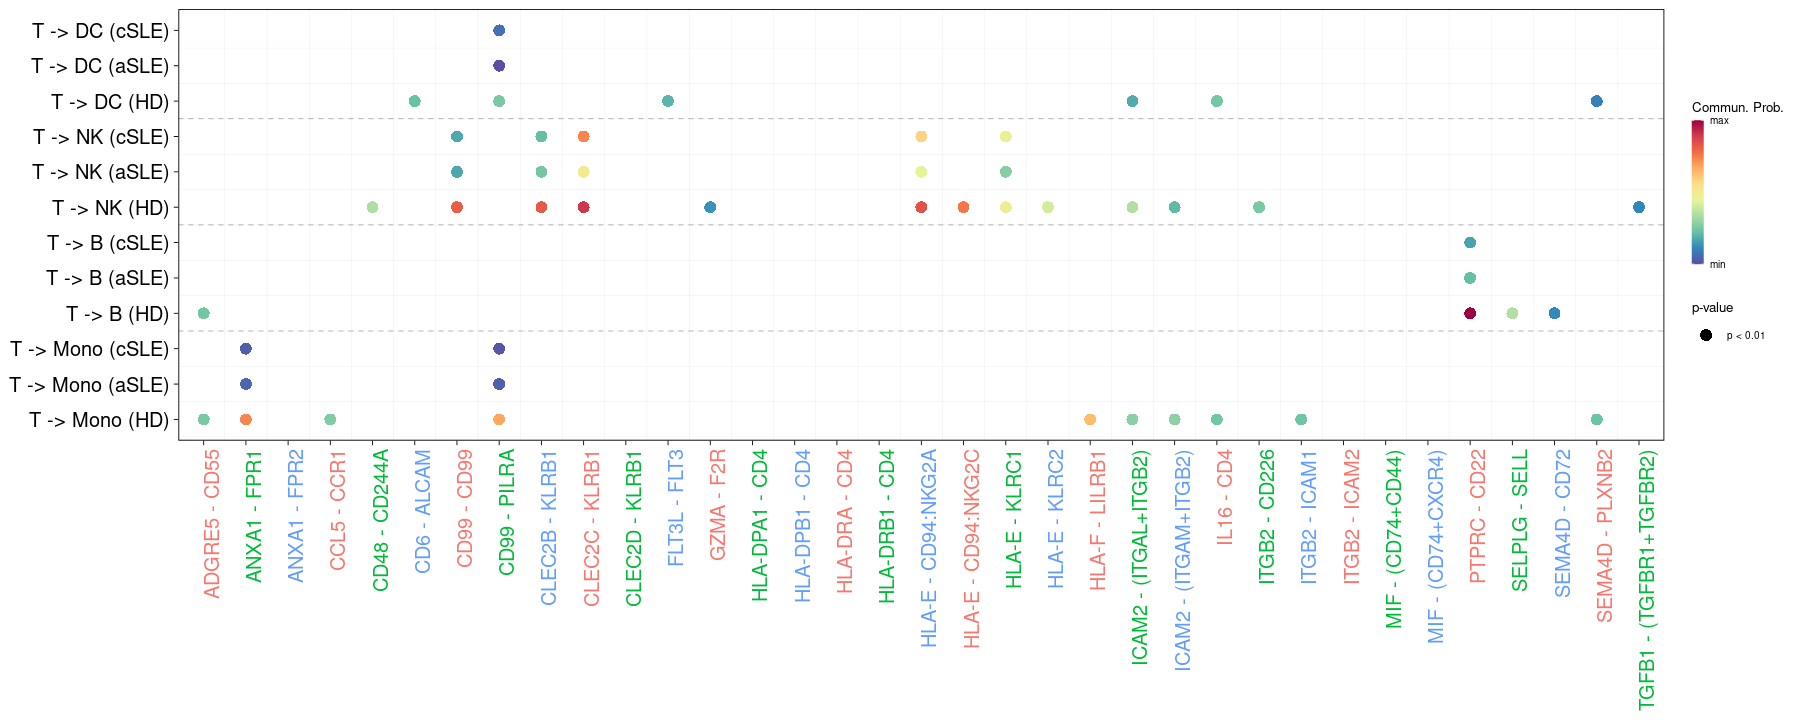

In [14]:
options(repr.plot.width=15,repr.plot.height=6)
p3 <- netVisual_bubble(cellchat, sources.use = 1, targets.use = c(2,3,4,5),max.dataset = 1,min.dataset = c(2,3),
                 comparison = c(1, 2,3), angle.x = 45,font.size=15)+coord_flip()+theme(axis.text.x=element_text(angle=90, hjust=1))
p3
ggsave(filename='./sle_picture/Fig5/netbub_3.pdf',plot=p3,width=15,height=6)

Comparing communications on a merged object 




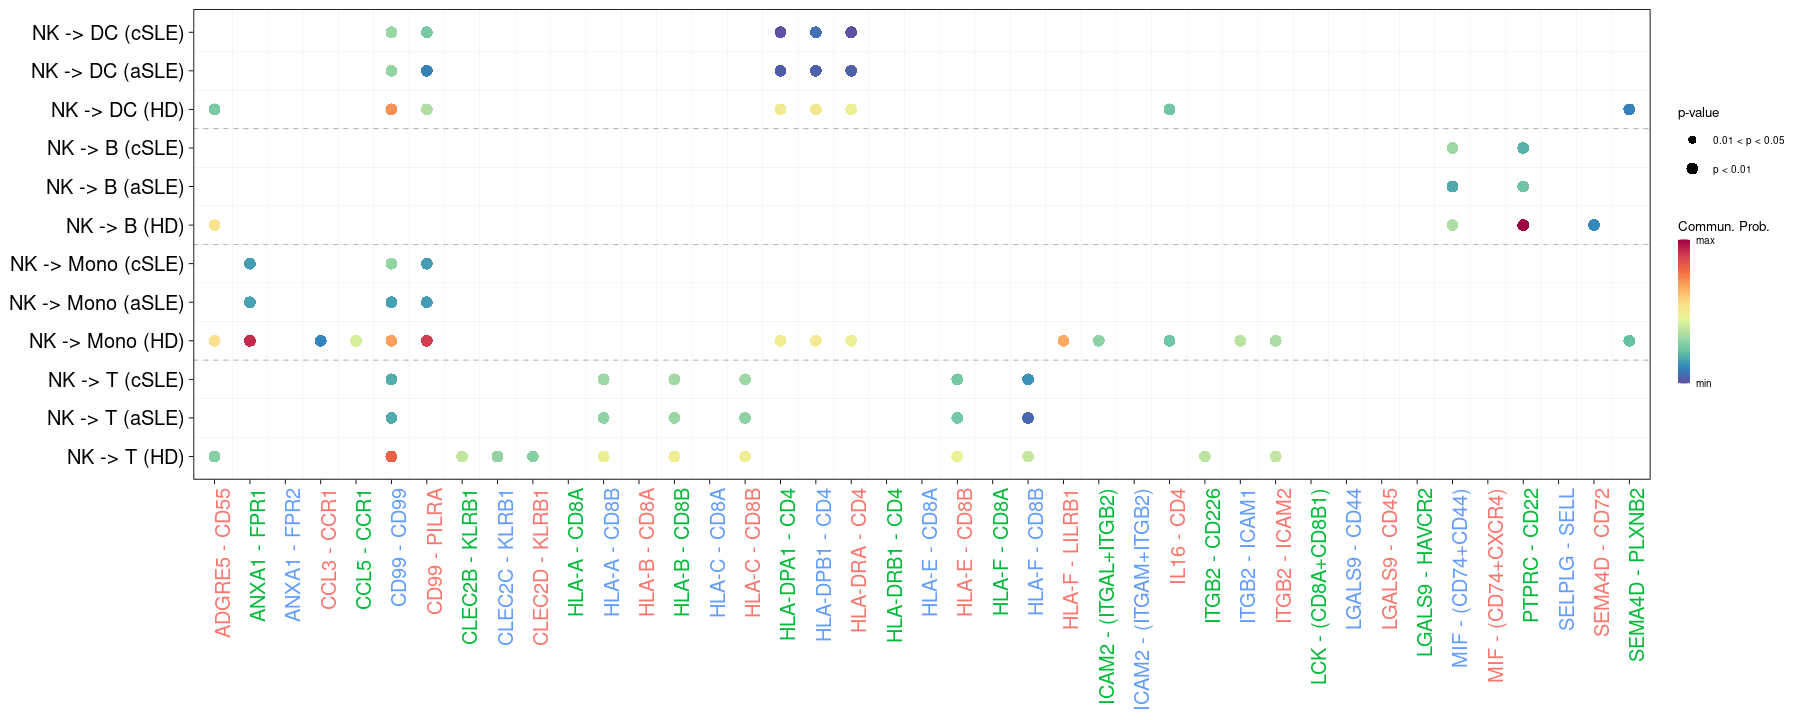

In [15]:
options(repr.plot.width=15,repr.plot.height=6)
p4 <- netVisual_bubble(cellchat, sources.use =4, targets.use = c(1,2,3,5),max.dataset = 1,min.dataset = c(2,3),
                 comparison = c(1, 2,3), angle.x = 45,font.size=15)+coord_flip()+theme(axis.text.x=element_text(angle=90, hjust=1))
p4
ggsave(filename='./sle_picture/Fig5/netbub_4.pdf',plot=p4,width=15,height=6)

Comparing communications on a merged object 




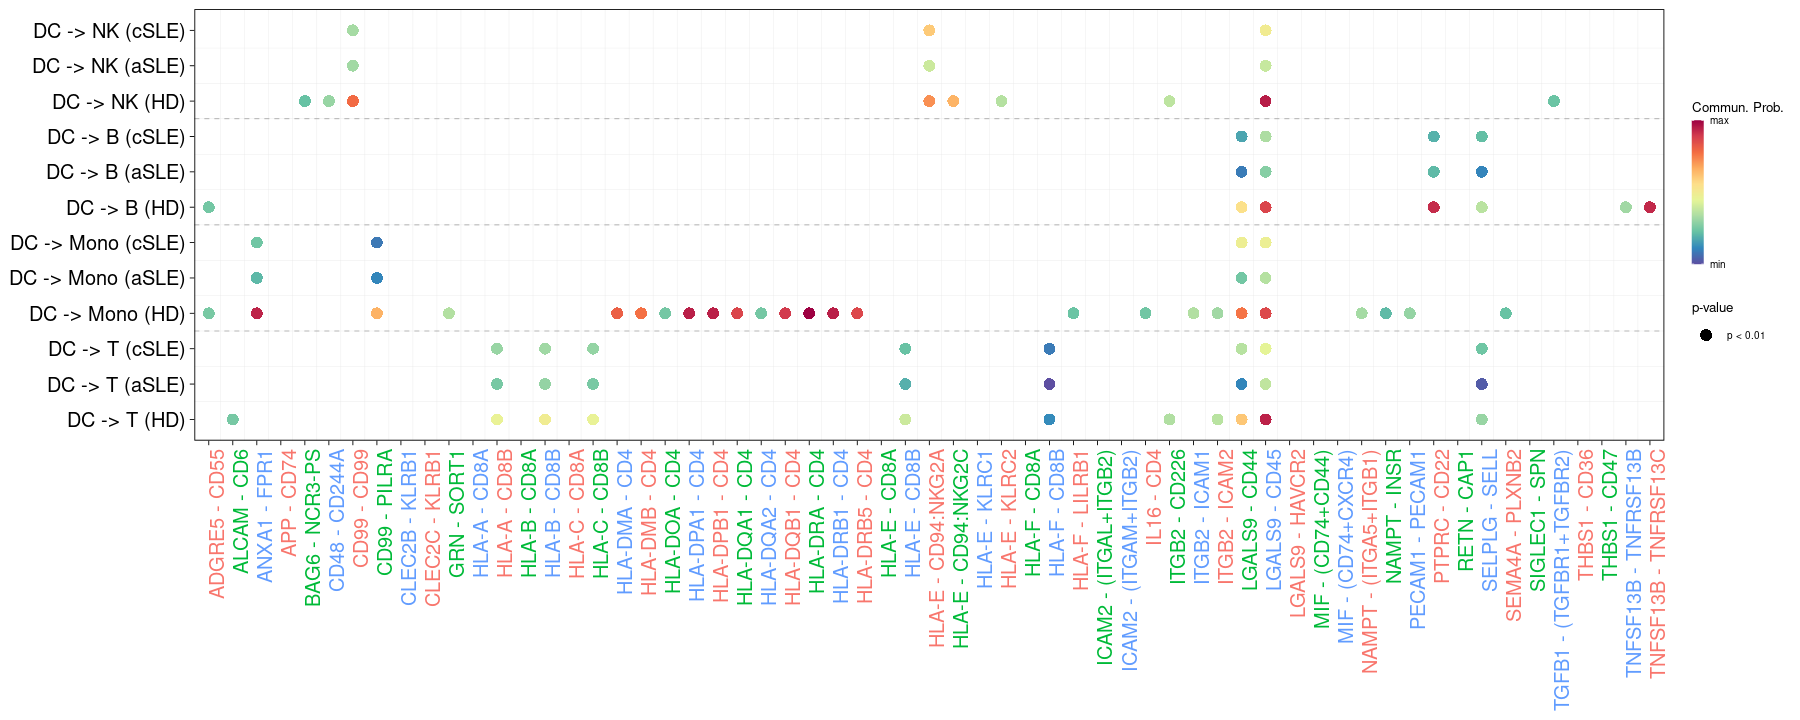

In [16]:
options(repr.plot.width=15,repr.plot.height=6)
p5 <- netVisual_bubble(cellchat, sources.use = 5, targets.use = c(1,2,3,4),max.dataset = 1,min.dataset = c(2,3),
                 comparison = c(1, 2,3), angle.x = 45,font.size=15)+coord_flip()+theme(axis.text.x=element_text(angle=90, hjust=1))
p5
ggsave(filename='./sle_picture/Fig5/netbub_5.pdf',plot=p5,width=15,height=6)